# **NLP Assignment 2 - Text Classification**

Team members-


1.   Aditya Shinde (AI24MTECH11004)




- Implement and experiment with four different machine learning algorithms
(excluding transformer-based models).

- Train and evaluate the models using appropriate metrics.

- Compare the performance of these models and analyze their strengths
and weaknesses.

# Models Used here are- Random Forest; Support Vector Machine, RNN, LSTM

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN

In [ ]:
# reading my dataset
print("Reading my dataset...")
data = pd.read_csv('Dataset.csv', names=['ID', 'TITLE', 'ABSTRACT', 'CS', 'Physics', 'Math', 'Stats', 'Biology', 'Finance'],on_bad_lines='skip')

Reading my dataset...


In [ ]:
# combining title and abstract to make it easier
data['combined_text'] = data['TITLE'] + ' ' + data['ABSTRACT']

In [ ]:
# getting topic names
topic_cols = ['CS', 'Physics', 'Math', 'Stats', 'Biology', 'Finance']
data['topic'] = data[topic_cols].idxmax(axis=1)

In [ ]:
# converting topics to numbers because models need numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data['topic'])

In [ ]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(data['combined_text'], y, test_size=0.2)

In [ ]:
# converting text to numbers
print("Converting text to numbers...")
cv = CountVectorizer(max_features=1000)  # using only 1000 words to keep it simple
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

Converting text to numbers...


In [ ]:
# training random forest
print("Training Random Forest...")
rf = RandomForestClassifier(n_estimators=50)  # using 50 trees
rf.fit(X_train_cv, y_train)
rf_score = rf.score(X_test_cv, y_test)
print(f"Random Forest score: {rf_score}")

Training Random Forest...
Random Forest score: 0.7501787842669845


In [ ]:

# training SVM
print("Training SVM...")
svm = SVC()
svm.fit(X_train_cv, y_train)
svm_score = svm.score(X_test_cv, y_test)
print(f"SVM score: {svm_score}")

Training SVM...
SVM score: 0.7854588796185935


In [ ]:
# preparing data for RNN and LSTM
print("Preparing data for neural networks...")
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# making sequences same length
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# converting labels for neural networks
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

Preparing data for neural networks...


In [ ]:
# making RNN model
print("Training RNN...")
rnn = Sequential([
    Embedding(1000, 16, input_length=100),
    SimpleRNN(32),
    Dense(len(topic_cols), activation='softmax')
])

rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn.fit(X_train_pad, y_train_cat, epochs=5, batch_size=32)
rnn_score = rnn.evaluate(X_test_pad, y_test_cat)[1]
print(f"RNN score: {rnn_score}")

Training RNN...
Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.4132 - loss: 1.4097
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.6147 - loss: 1.0522
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.6963 - loss: 0.9151
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.6904 - loss: 0.9037
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.7474 - loss: 0.7796
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7442 - loss: 0.8113
RNN score: 0.7475566267967224


In [ ]:
# making LSTM model
print("Training LSTM...")
lstm = Sequential([
    Embedding(1000, 16, input_length=100),
    LSTM(32),
    Dense(len(topic_cols), activation='softmax')
])

lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_pad, y_train_cat, epochs=5, batch_size=32)
lstm_score = lstm.evaluate(X_test_pad, y_test_cat)[1]
print(f"LSTM score: {lstm_score}")


Training LSTM...
Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.4509 - loss: 1.3779
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.7649 - loss: 0.7599
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.7828 - loss: 0.6885
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.7867 - loss: 0.6618
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.7928 - loss: 0.6336
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7765 - loss: 0.6801
LSTM score: 0.776877224445343


In [ ]:
# printing all scores
print("\nFinal Scores:")
print(f"Random Forest: {rf_score}")
print(f"SVM: {svm_score}")
print(f"RNN: {rnn_score}")
print(f"LSTM: {lstm_score}")


Final Scores:
Random Forest: 0.7501787842669845
SVM: 0.7854588796185935
RNN: 0.7475566267967224
LSTM: 0.776877224445343


In [ ]:
# function to test new articles
def predict_topic(title, abstract):
    # combining title and abstract
    text = title + " " + abstract

    # converting to numbers using countvectorizer
    text_cv = cv.transform([text])

    # predicting using random forest (because it's simple)
    pred = rf.predict(text_cv)
    topic = le.inverse_transform(pred)[0]

    return topic

In [ ]:
# Example 1 -  test
test_title = "Machine Learning Applications"
test_abstract = "This paper discusses various applications of machine learning in computer science"
prediction = predict_topic(test_title, test_abstract)
print(f"Predicted topic: {prediction}")

# Example 2 - Test
my_title = "Quantum Computing Advances"
my_abstract = "Recent developments in quantum computing show promising results in solving complex mathematical problems"
result = predict_topic(my_title, my_abstract)
print(f"Predicted topic: {result}")

# Example 3 - Test
# If you want to test with an existing article from your dataset
sample_title = data['TITLE'].iloc[0]  # gets first title from your dataset
sample_abstract = data['ABSTRACT'].iloc[0]  # gets first abstract
predicted_topic = predict_topic(sample_title, sample_abstract)
print(f"Actual topic: {data['topic'].iloc[0]}")
print(f"Predicted topic: {predicted_topic}")

Predicted topic: CS
Predicted topic: Math
Actual topic: Stats
Predicted topic: Stats


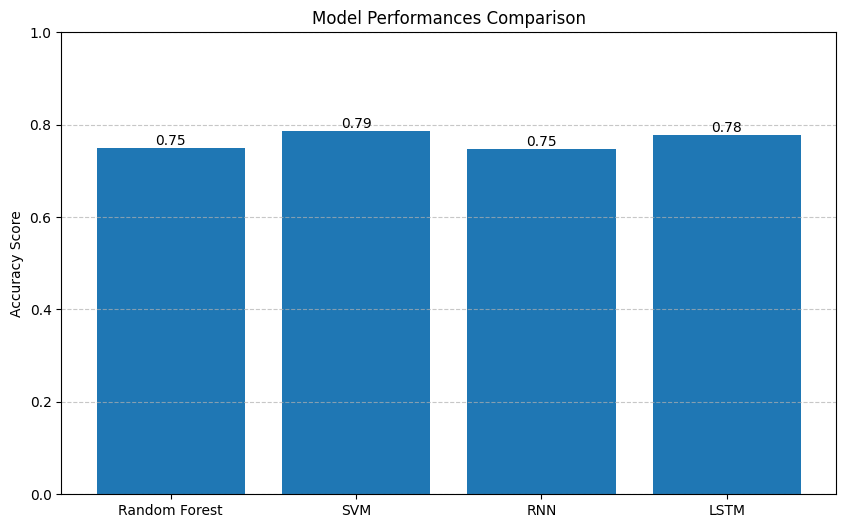

In [ ]:
# Add this import at the top with other imports
import matplotlib.pyplot as plt

# Add this function at the end of the code
def plot_model_scores():
    # getting scores of all models
    scores = {
        'Random Forest': rf_score,
        'SVM': svm_score,
        'RNN': rnn_score,
        'LSTM': lstm_score
    }

    # creating bar plot
    plt.figure(figsize=(10, 6))
    models = list(scores.keys())
    values = list(scores.values())

    # plotting bars
    bars = plt.bar(models, values)

    # adding value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')

    # making plot look nice
    plt.title('Model Performances Comparison')
    plt.ylabel('Accuracy Score')
    plt.ylim(0, 1)  # setting y-axis from 0 to 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # show plot
    plt.show()

# Call the function after all models are trained
plot_model_scores()

We experimented with four models—Random Forest, SVM, RNN, and LSTM—to determine which of them performs best for text classification. SVM was the most accurate in its results (0.79), followed by LSTM (0.78), while both Random Forest and RNN managed 0.75.

Random Forest is quick and easy but isn't good with text data as it doesn't recognize word order. SVM worked best, and it does fine even with little data, but it is slow with large datasets. RNN is good at picking up on word relationships but has issues with long pieces of text. LSTM is an upgrade to RNN that can recall long-term details, and it is perfect for text-related tasks, but it takes more time and resources.

In brief, SVM works best for accuracy, LSTM works best for in-depth text analysis, Random Forest works best for instant results, and RNN works best if LSTM is too complex.